**Prática de Histogramas**

1) 
- Produza a imagem ‘negativa’ do arquivo ‘im_cells.png’
- Com a imagem negativa, produza a imagem original novamente. 
- Mostre lado a lado a imagem original e a negativa. Em qual deles os objetos presentes na imagem são melhor percebidos? Justifique.
- Aplique a imagem uma função logarítmica.


Os objetos presentes na imagem são melhor percebidos na imagem original


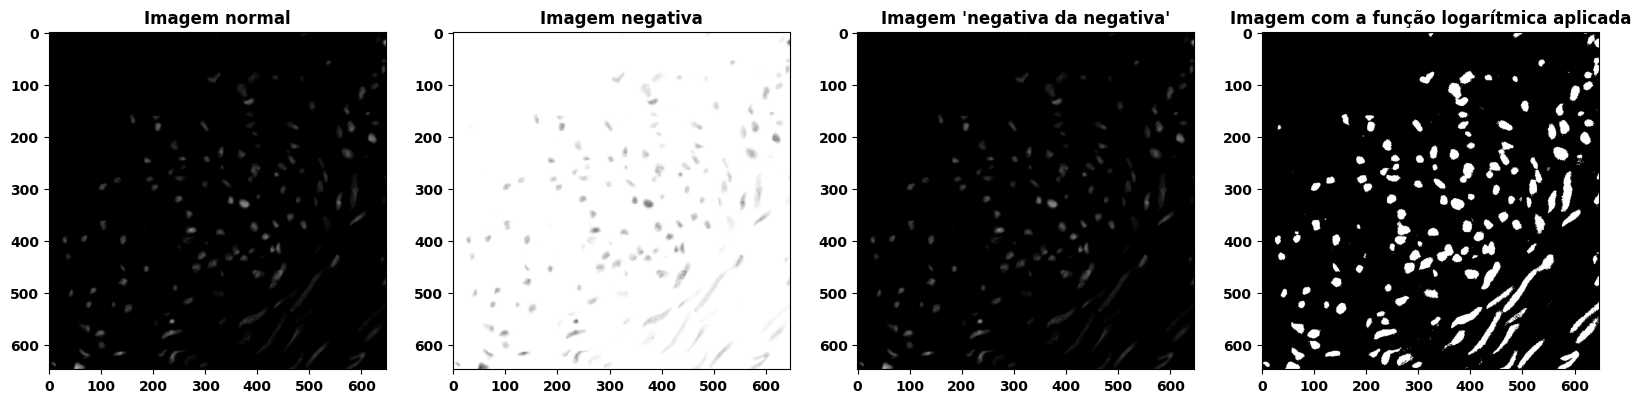

In [ ]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(20,20))
 
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem normal")
#-------------------------------------------------------------------------------------
img2 = 255 - img     
plt.subplot(1, 4, 2)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255) 
plt.title("Imagem negativa")
#-------------------------------------------------------------------------------------
img3 = 255 - img2
plt.subplot(1, 4, 3)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255) 
plt.title("Imagem 'negativa da negativa'")
#-------------------------------------------------------------------------------------
img4 = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)
img5 = 255 * np.log2(img4.astype(np.float32)+1)
plt.subplot(1, 4, 4)
plt.imshow(img5, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem com a função logarítmica aplicada")

print("Os objetos presentes na imagem são melhor percebidos na imagem original")


2)
- Abra a imagem 'pout.tif' e mostre seu histograma.
- Equalize a imagem anterior e mostre novamente seu histograma. Mostra a curva de transformação (consulte https://www.mathworks.com/help/images/histogram-equalization.html)
(procurar função OpenCV)



<function matplotlib.pyplot.show(close=None, block=None)>

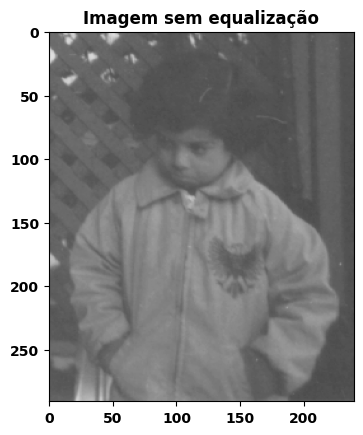

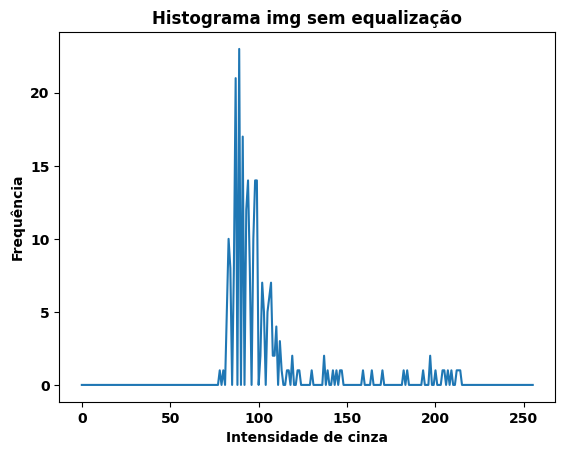

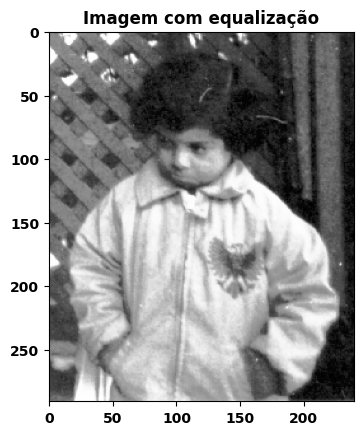

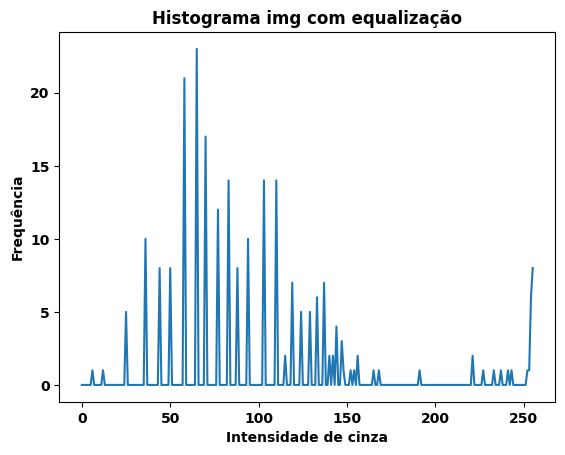

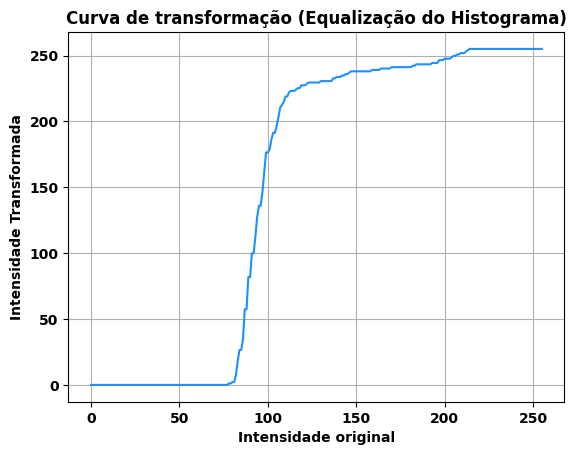

In [ ]:
# code here
img = cv2.imread("pout.tif", cv2.IMREAD_GRAYSCALE)

plt.figure()
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem sem equalização")
#-------------------------------------------------------------------------------------
plt.figure()
hist = cv2.calcHist(img, [0], None, [256], [0, 256])
plt.plot(hist)
plt.title("Histograma img sem equalização")
plt.xlabel("Intensidade de cinza")
plt.ylabel("Frequência")
plt.show
#-------------------------------------------------------------------------------------
plt.figure()
imgEq = cv2.equalizeHist(img)
plt.imshow(imgEq, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem com equalização")
#-------------------------------------------------------------------------------------
plt.figure()
histEq = cv2.calcHist(imgEq, [0], None, [256], [0, 256])
plt.plot(histEq)
plt.title("Histograma img com equalização")
plt.xlabel("Intensidade de cinza")
plt.ylabel("Frequência")
plt.show
#-------------------------------------------------------------------------------------
cdf = hist.cumsum()
cdf = cdf.astype(np.float64)
cdfNorm = (cdf - cdf.min())*255/(cdf.max()-cdf.min()) #fórmula classica da normalização

plt.figure()
plt.plot(cdfNorm, color = '#1e90ff')
plt.title("Curva de transformação (Equalização do Histograma)")
plt.xlabel("Intensidade original")
plt.ylabel("Intensidade Transformada")
plt.grid(True)
plt.show


3) *Implemente* o algoritmo de equalização de histograma e aplique a imagem ‘imcells.png’. Use o mínimos de laços for - tente realizar operações diretas com matrizes e vetores do numpy
- Aplique o mesmo algortimo 2x na mesma imagem e compare os resultados

Tamanho da imagem :  (647, 647)


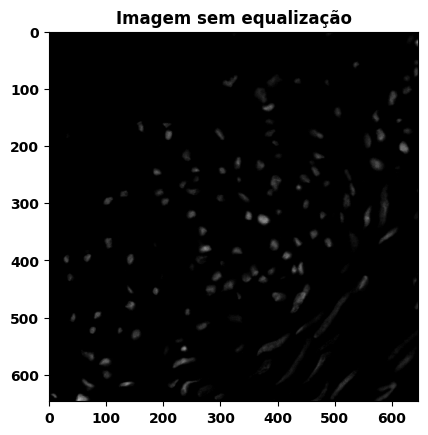

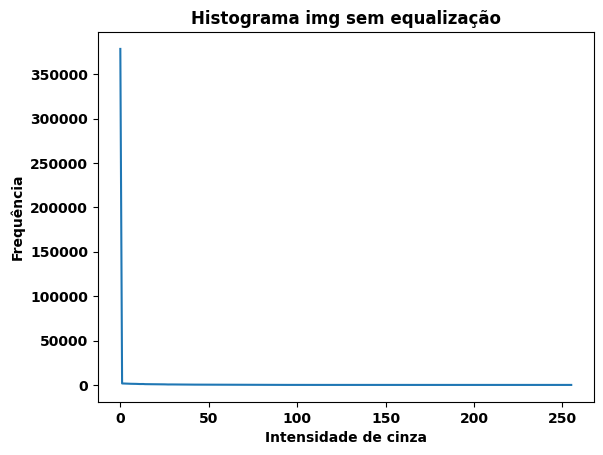

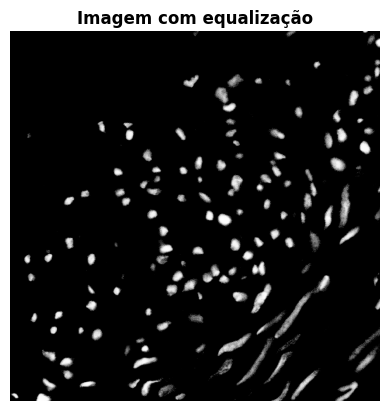

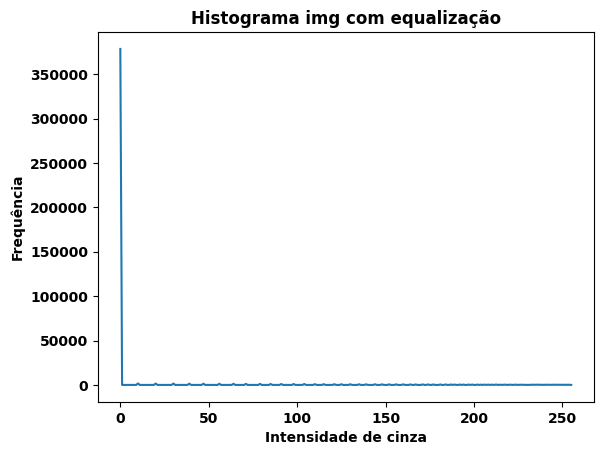

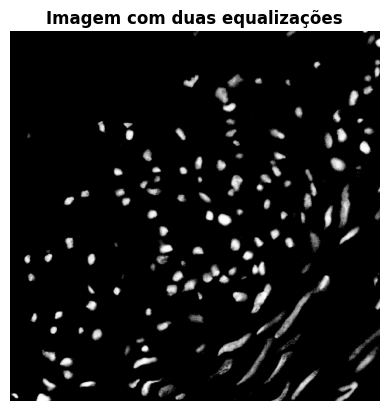

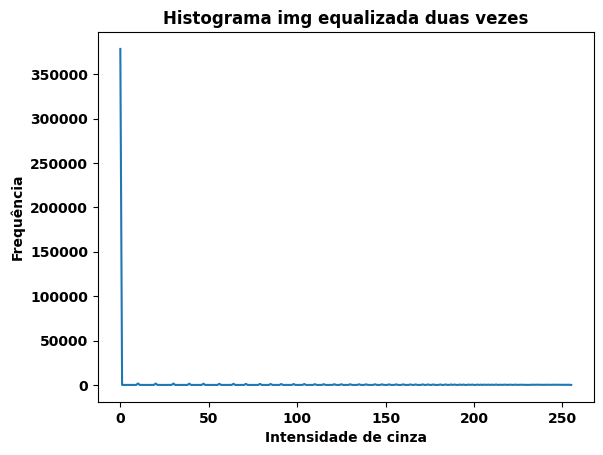

In [ ]:
img = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)

plt.figure()
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem sem equalização")
print('Tamanho da imagem : ',img.shape)
#-------------------------------------------------------------------------------------
plt.figure()
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)
plt.title("Histograma img sem equalização")
plt.xlabel("Intensidade de cinza")
plt.ylabel("Frequência")
plt.show()   
#-------------------------------------------------------------------------------------
# Uma equalização
plt.figure()
cdf = hist.cumsum()
cdf = cdf.astype(np.float64)
cdfNorm = (cdf - cdf.min())*255/(cdf.max()-cdf.min())
cdfNorm = cdfNorm.astype('uint8')

imgEq = cdfNorm[img]
plt.title("Imagem com equalização")
plt.imshow(imgEq, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()
#-------------------------------------------------------------------------------------
plt.figure()
histEq = cv2.calcHist([imgEq], [0], None, [256], [0, 256])
plt.plot(histEq)
plt.title("Histograma img com equalização")
plt.xlabel("Intensidade de cinza")
plt.ylabel("Frequência")
plt.show()
#-------------------------------------------------------------------------------------
# Duas equalizações
plt.figure()
cdfEq = histEq.cumsum().astype(np.float64)
cdfNormEq = (cdfEq - cdfEq.min())*255/(cdfEq.max()-cdfEq.min())
cdfNormEq = cdfNormEq.astype('uint8')

imgEq2 = cdfNormEq[imgEq]
plt.title("Imagem com duas equalizações")
plt.imshow(imgEq2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()
#-------------------------------------------------------------------------------------
plt.figure()
histEq2 = cv2.calcHist([imgEq2], [0], None, [256], [0, 256])
plt.plot(histEq2)
plt.title("Histograma img equalizada duas vezes")
plt.xlabel("Intensidade de cinza")
plt.ylabel("Frequência")
plt.show()

# A equalização 1x melhora bem o contraste.
# A equalização 2x muda quase nada em relação à primeira.
